This notebook uses episodic training with raw mutation data as input data.

This uses AUROC when validating model during training and saving best model. TCGA is seen by model when training. There are 2 domain-specific modules, for cell-line and TCGA.

This is an ablation study where the random classifier component of Epi-FCR is absent.

#### Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys

sys.path.append("../../vae_zinb_reprn/")
sys.path.append("../src/")

In [3]:
import datetime
import logging
import time
import torch
import random

In [4]:
from EpiFCModel import ModelEpiFC

In [5]:
chosen_seed = 42
torch.manual_seed(chosen_seed)
random.seed(chosen_seed)
np.random.seed(chosen_seed)

In [6]:
torch.multiprocessing.set_sharing_strategy('file_system')

### PACLITAXEL

In [7]:
best_parameters = {'audrc_threshold': 0.26647883534298583,
 'ldr': 0.4551569904222381,
 'lr': 0.43412444265602357,
 'weight_decay': 0.01765619910920584,
 'momentum': 0.8535158190785519,
 'step_size': 29,
 'loss_weight_epic': 1.266350619733658,
 'loss_weight_epif': 3.4153421051191364,
 'hd': 3,
 'batch_size': 32,
 'loops_agg_warm': 60,
 'loops_train': 600,
 'loops_warm': 100,
 'warm_up_agg': 1,
 'test_every': 1,
 'ite_train_epi_c': 0,
 'ite_train_epi_f': 90,
 'bn_eval': 0,
 'seed': 42}

In [8]:
model_PACLITAXEL = ModelEpiFC('PACLITAXEL', 'mutation')
#  Unable to calculate AUROC for validation set 1
model_PACLITAXEL.get_results(best_parameters)

DomainSpecificNN(
  (feature1): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.4551569904222381, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.4551569904222381, inplace=False)
      (8): Linear(in_features=128, out_features=128, bias=True)
      (9): Sigmoid()
    )
  )
  (feature2): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.4551569904222381, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d(12

/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,68,{0: 68},NaN,-0.000000
0,PDX,8,{0: 8},NaN,-0.000000
0,TCGA,31,"{1: 23, 0: 8}",0.793478,0.904847


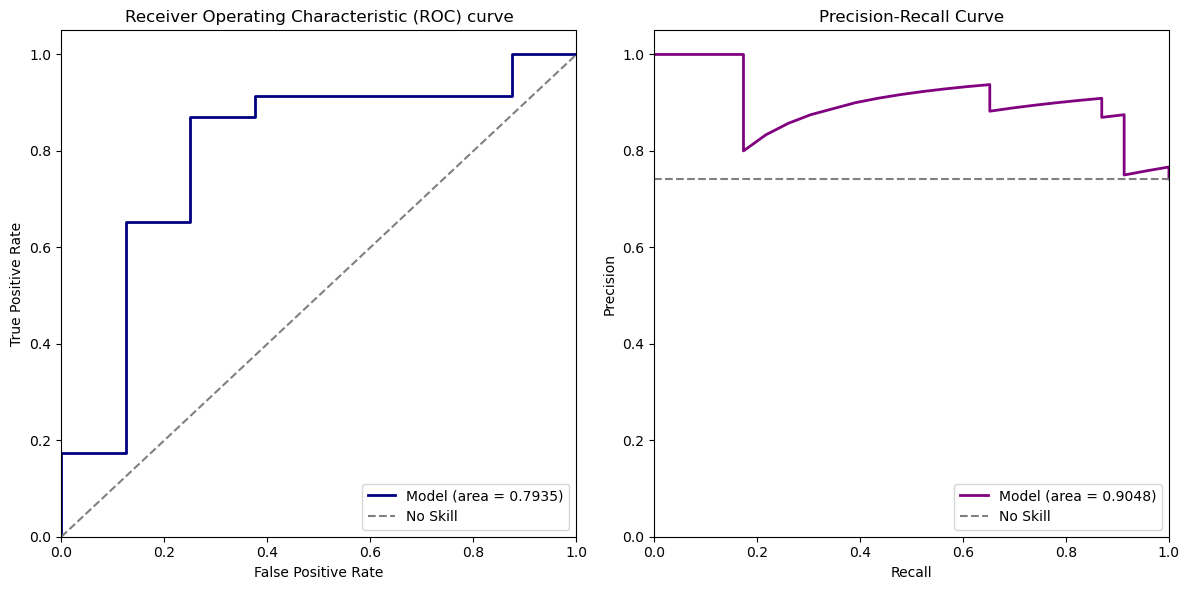

In [9]:
model_PACLITAXEL.get_roc_pr_curves(best_parameters, False, 'tcga')

In [10]:
model_PACLITAXEL.get_train_set_results(best_parameters, False)

Threshold used for cell-line with PACLITAXEL: 0.26647883534298583


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,608,"{0: 605, 1: 3}",0.763636,0.042407
0,PDX,35,"{0: 30, 1: 5}",0.546667,0.198360
0,TCGA,82,"{1: 53, 0: 29}",0.936239,0.940868


Distribution of Predictions by Model
[0.30486739 0.48691481 0.56671512 0.61348957 0.71798635]
TP: 20, FP: 2, TN: 6, FN: 3


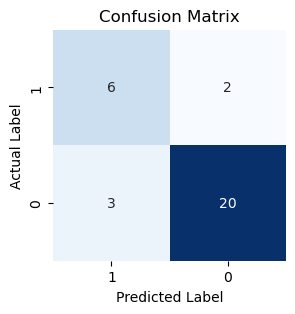

In [11]:
model_PACLITAXEL.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

### CISPLATIN

In [12]:
best_parameters = {'audrc_threshold': 0.3005134599842131,
 'ldr': 0.5976620429009198,
 'lr': 0.45241747559048234,
 'weight_decay': 0.0472173262014985,
 'momentum': 0.6814928613603115,
 'step_size': 98,
 'loss_weight_epic': 6.696937263943255,
 'loss_weight_epif': 1.8418088788166642,
 'loops_agg_warm': 90,
 'loops_warm': 80,
 'warm_up_agg': 0,
 'ite_train_epi_c': 90,
 'ite_train_epi_f': 80,
 'hd': 3,
 'batch_size': 32,
 'loops_train': 200,
 'test_every': 1,
 'bn_eval': 0,
 'seed': 42}

In [13]:
model_CISPLATIN = ModelEpiFC('CISPLATIN', 'mutation')
#  Unable to calculate AUROC for validation set 1
model_CISPLATIN.get_results(best_parameters)

DomainSpecificNN(
  (feature1): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.5976620429009198, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.5976620429009198, inplace=False)
      (8): Linear(in_features=128, out_features=128, bias=True)
      (9): Sigmoid()
    )
  )
  (feature2): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.5976620429009198, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d(12

,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,54,"{0: 53, 1: 1}",0.867925,0.125000
0,TCGA,36,"{1: 27, 0: 9}",0.609053,0.840784


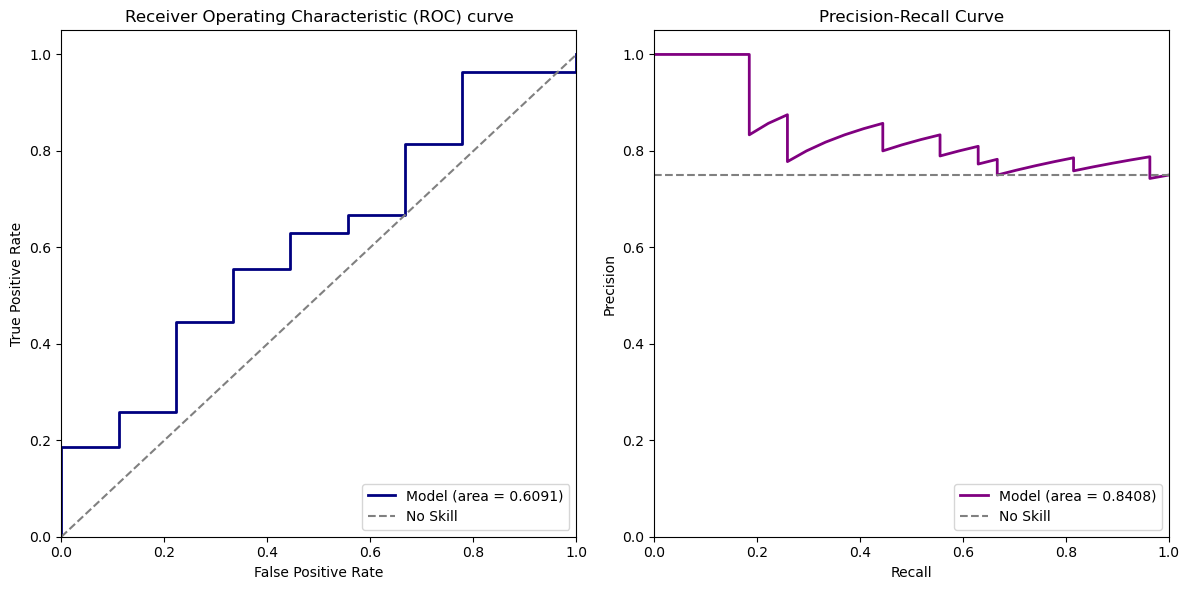

In [14]:
model_CISPLATIN.get_roc_pr_curves(best_parameters, False, 'tcga')

In [15]:
model_CISPLATIN.get_train_set_results(best_parameters, False)

Threshold used for cell-line with CISPLATIN: 0.3005134599842131
Test set Idx 1 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,483,"{0: 478, 1: 5}",0.534937,0.015138
0,PDX,0,{},NaN,NaN
0,TCGA,170,"{1: 130, 0: 40}",0.505288,0.779644


Distribution of Predictions by Model
[0.96868199 0.96921451 0.96943626 0.96957023 0.97012448]
TP: 27, FP: 9, TN: 0, FN: 0


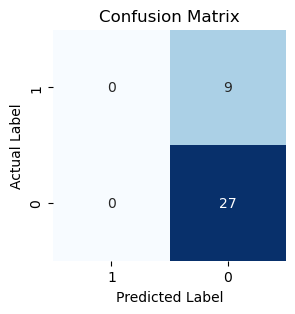

In [16]:
model_CISPLATIN.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## 5-FLUOROURACIL

In [17]:
best_parameters = {'audrc_threshold': 0.2899751335382461,
 'ldr': 0.32104366391897204,
 'lr': 0.028229788541793824,
 'weight_decay': 0.06419432163238525,
 'momentum': 0.5752832210063934,
 'step_size': 30,
 'loss_weight_epic': 6.455292284488678,
 'loss_weight_epif': 2.7492030262947083,
 'hd': 4,
 'batch_size': 32,
 'loops_agg_warm': 80,
 'loops_train': 300,
 'loops_warm': 80,
 'warm_up_agg': 0,
 'test_every': 1,
 'ite_train_epi_c': 0,
 'ite_train_epi_f': 90,
 'bn_eval': 0,
 'seed': 42}

In [18]:
model_5_FLUOROURACIL = ModelEpiFC('5-FLUOROURACIL', 'mutation')
#  Unable to calculate AUROC for validation set 1
model_5_FLUOROURACIL.get_results(best_parameters)

DomainSpecificNN(
  (feature1): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.32104366391897204, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.32104366391897204, inplace=False)
      (8): Linear(in_features=64, out_features=64, bias=True)
      (9): Sigmoid()
    )
  )
  (feature2): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.32104366391897204, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e

/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,61,{0: 61},NaN,-0.000000
0,TCGA,21,"{1: 17, 0: 4}",0.838235,0.957734


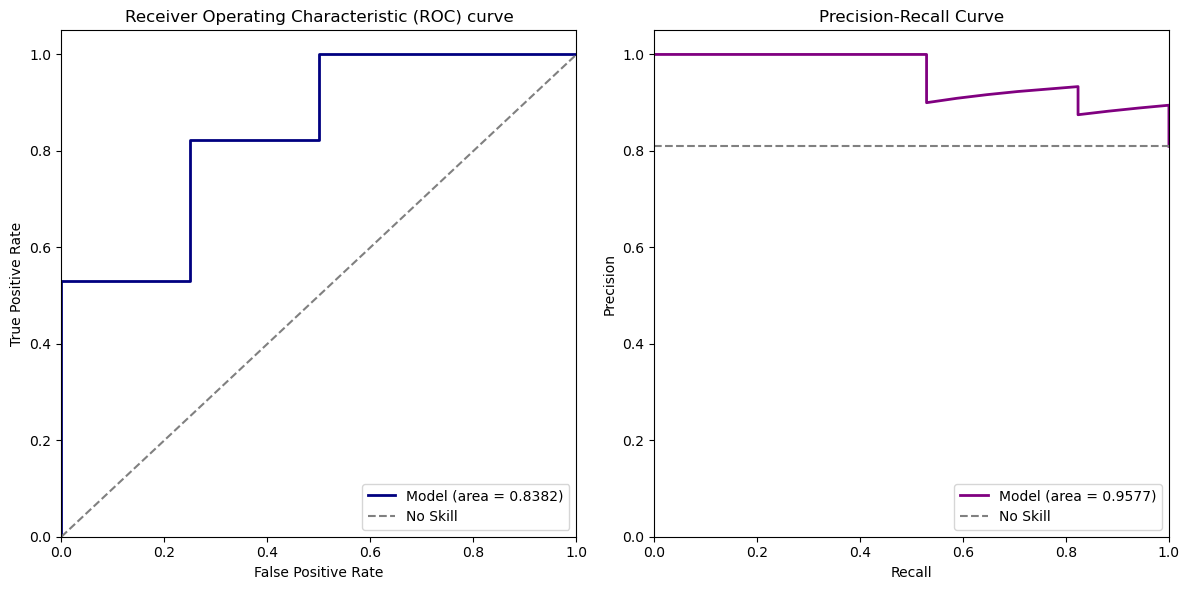

In [19]:
model_5_FLUOROURACIL.get_roc_pr_curves(best_parameters, False, 'tcga')

In [20]:
model_5_FLUOROURACIL.get_train_set_results(best_parameters, False)

Threshold used for cell-line with 5-FLUOROURACIL: 0.2899751335382461
Test set Idx 0 has only response [0]
Test set Idx 1 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,528,{0: 528},NaN,NaN
0,PDX,0,{},NaN,NaN
0,TCGA,104,"{1: 65, 0: 39}",0.55858,0.706147


Distribution of Predictions by Model
[0.49885476 0.49921221 0.49960822 0.499708   0.49997145]
TP: 0, FP: 0, TN: 4, FN: 17


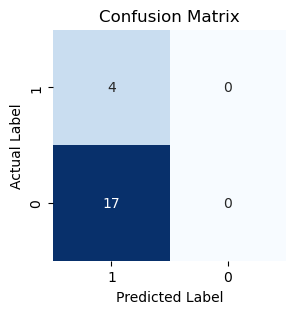

In [21]:
model_5_FLUOROURACIL.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## CYCLOPHOSPHAMIDE

In [22]:
best_parameters = {'audrc_threshold': 0.49937833845615387,
 'ldr': 0.07157617121934891,
 'batch_size': 128,
 'lr': 0.21261892080307007,
 'weight_decay': 0.05283692684292794,
 'momentum': 0.050616636872291565,
 'step_size': 51,
 'loss_weight_epic': 5.244421184062958,
 'loss_weight_epif': 1.547518938779831,
 'loops_agg_warm': 100,
 'loops_train': 250,
 'loops_warm': 50,
 'warm_up_agg': 1,
 'ite_train_epi_c': 150,
 'ite_train_epi_f': 150,
 'hd': 2,
 'test_every': 1,
 'bn_eval': 0,
 'seed': 42}

In [23]:
model_CYCLOPHOSPHAMIDE = ModelEpiFC('CYCLOPHOSPHAMIDE', 'mutation')
#  Unable to calculate AUROC for validation set 1
model_CYCLOPHOSPHAMIDE.get_results(best_parameters)

DomainSpecificNN(
  (feature1): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.07157617121934891, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (feature2): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.07157617121934891, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier1): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=256, out_features=1, bias=True)
    )
  )
  (classifier2): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=25

,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,66,"{0: 64, 1: 2}",0.195312,0.027493
0,TCGA,19,"{1: 17, 0: 2}",0.941176,0.993272


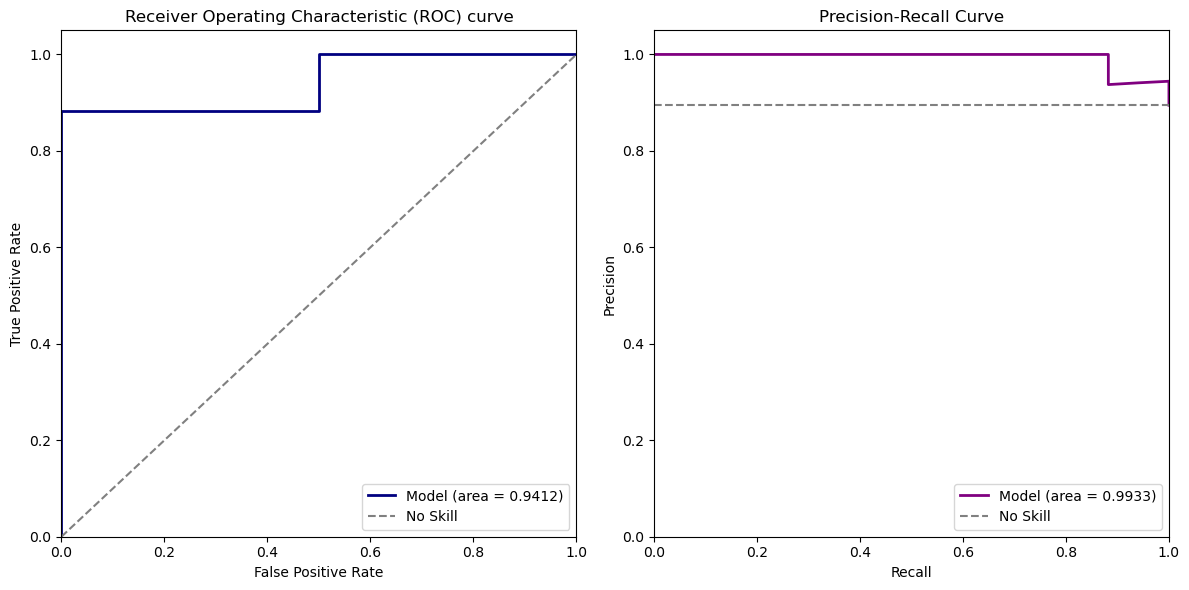

In [24]:
model_CYCLOPHOSPHAMIDE.get_roc_pr_curves(best_parameters, False, 'tcga')

In [25]:
model_CYCLOPHOSPHAMIDE.get_train_set_results(best_parameters, False)

Threshold used for cell-line with CYCLOPHOSPHAMIDE: 0.49937833845615387
Test set Idx 1 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,579,"{0: 561, 1: 18}",0.479402,0.044250
0,PDX,0,{},NaN,NaN
0,TCGA,50,"{1: 47, 0: 3}",0.936170,0.995931


Distribution of Predictions by Model
[0.74966908 0.76010758 0.76189214 0.76562726 0.76660526]
TP: 17, FP: 2, TN: 0, FN: 0


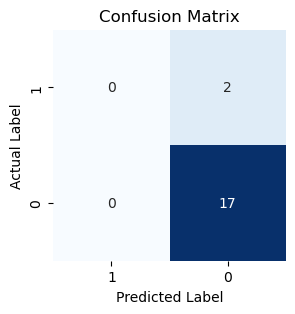

In [26]:
model_CYCLOPHOSPHAMIDE.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## GEMCITABINE

In [27]:
best_parameters = {'audrc_threshold': 0.3998756676912308,
 'ldr': 0.412087327837944,
 'lr': 0.22698725104331968,
 'weight_decay': 0.02677728652954102,
 'momentum': 0.3792483150959015,
 'step_size': 15,
 'loss_weight_epic': 2.731753706932068,
 'loss_weight_epif': 4.4952181577682495,
 'loops_agg_warm': 90,
 'loops_train': 300,
 'loops_warm': 70,
 'ite_train_epi_c': 0,
 'ite_train_epi_f': 100,
 'hd': 3,
 'batch_size': 64,
 'warm_up_agg': 1,
 'test_every': 1,
 'bn_eval': 0,
 'seed': 42}

In [28]:
model_GEMCITABINE = ModelEpiFC('GEMCITABINE', 'mutation')
#  Unable to calculate AUROC for validation set 1
model_GEMCITABINE.get_results(best_parameters)

DomainSpecificNN(
  (feature1): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.412087327837944, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.412087327837944, inplace=False)
      (8): Linear(in_features=128, out_features=128, bias=True)
      (9): Sigmoid()
    )
  )
  (feature2): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.412087327837944, inplace=False)
      (4): Linear(in_features=128, out_features=128, bias=True)
      (5): BatchNorm1d(128, 

/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,54,{0: 54},NaN,-0.000000
0,TCGA,18,"{0: 9, 1: 9}",0.851852,0.812654


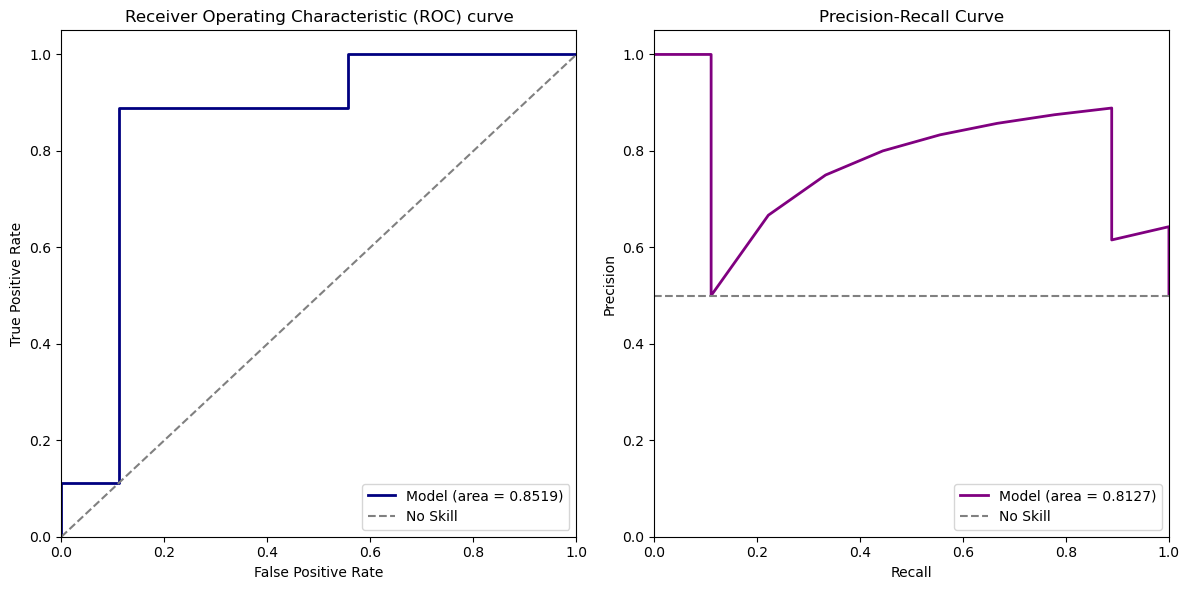

In [29]:
model_GEMCITABINE.get_roc_pr_curves(best_parameters, False, 'tcga')

In [30]:
model_GEMCITABINE.get_train_set_results(best_parameters, False)

Threshold used for cell-line with GEMCITABINE: 0.3998756676912308
Test set Idx 0 has only response [0]
Test set Idx 1 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,483,{0: 483},NaN,NaN
0,PDX,0,{},NaN,NaN
0,TCGA,44,"{1: 27, 0: 17}",0.971678,0.981639


Distribution of Predictions by Model
[0.2078523  0.26801316 0.2905902  0.30710714 0.36962336]
TP: 0, FP: 0, TN: 9, FN: 9


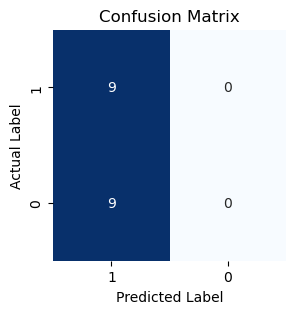

In [31]:
model_GEMCITABINE.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)